In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from prml.utils.datasets import ClassificationDataGenerator2,ClassificationDataGenerator3
from prml.linear_classifier import (
    LinearClassifier, 
    Fisher1D, 
    Fisher, 
    Perceptron, 
    GenerativeClassifier, 
    LogisticRegression, 
    MultiClassLogisticRegression, 
    BayesianLogisticRegression
)
from prml.utils.plot import plot_classifier

In [2]:
def f(x): 
    return x 

def f1(x):
    return x + 2

def f2(x):
    return x - 2

# Least squares for classification 

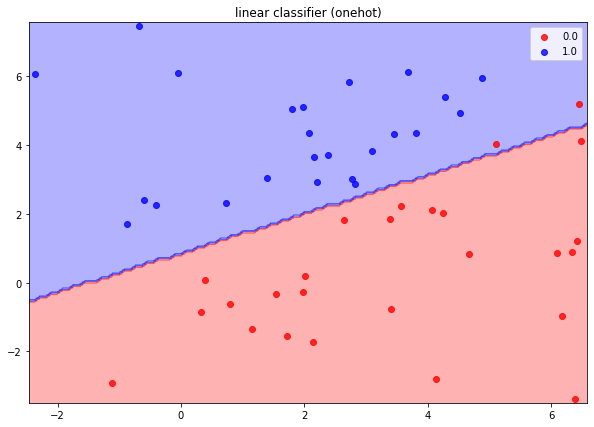

In [3]:
gen = ClassificationDataGenerator2(f) 
X,y = gen(encoding="onehot")  

lc = LinearClassifier() 
lc.fit(X,y)
plot_classifier(X,y,lc,title="linear classifier (onehot)")

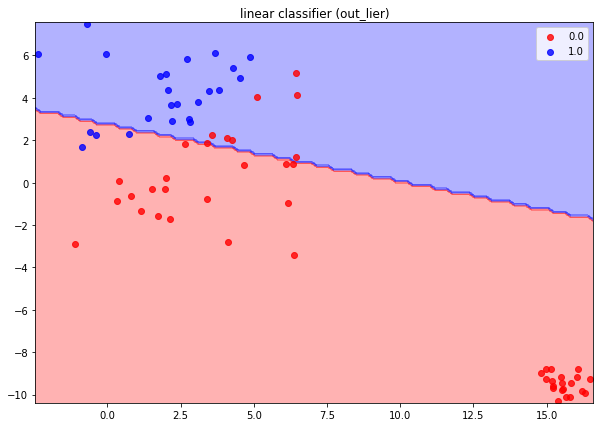

In [4]:
X_outlier,y_outlier = gen(n=20,encoding="onehot",x_lower=15,x_upper=16,y_lower=-10,y_upper=-9)
X = np.concatenate((X,X_outlier))
y = np.concatenate((y,y_outlier)) 

lc = LinearClassifier() 
lc.fit(X,y)
plot_classifier(X,y,lc,title="linear classifier (out_lier)")

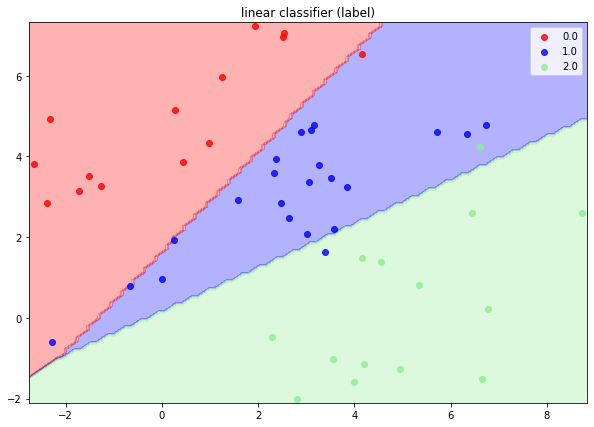

In [5]:
gen = ClassificationDataGenerator3(f1,f2) 
X,y = gen(encoding="label")   

lc = LinearClassifier() 
lc.fit(X,y)
plot_classifier(X,y,lc,title="linear classifier (label)")

# Fisher's linear discriminant
<h3>
    $$S_W = \sum_{n \in C_1}(x_n - m_1)(x_n - m_1)^\top + \sum_{n \in C_2}(x_n - m_2)(x_n - m_2)^\top$$
</h3>

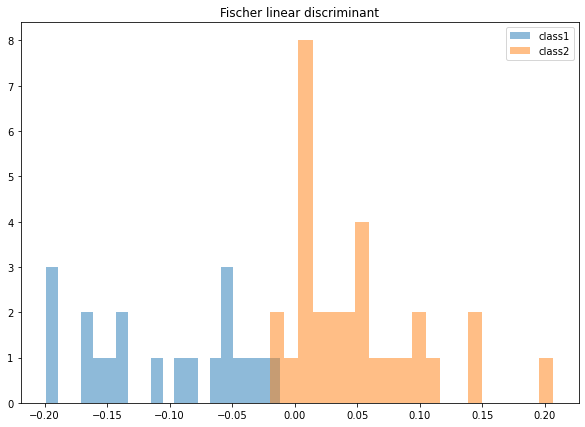

In [6]:
gen = ClassificationDataGenerator2(f) 
X,y = gen(encoding="onehot")  

fish = Fisher1D() 
X_1d = fish.fit_transform(X,y)
fig = plt.figure(figsize=(10,7)) 
X_1d_class1 = X_1d[y[:,0] == 1]
X_1d_class2 = X_1d[y[:,1] == 1]
ax = fig.add_subplot(1,1,1)
ax.hist(X_1d_class1,bins=20,alpha=0.5,label="class1")
ax.hist(X_1d_class2,bins=20,alpha=0.5,label="class2") 
ax.set_title("Fischer linear discriminant")
plt.legend()
plt.show()

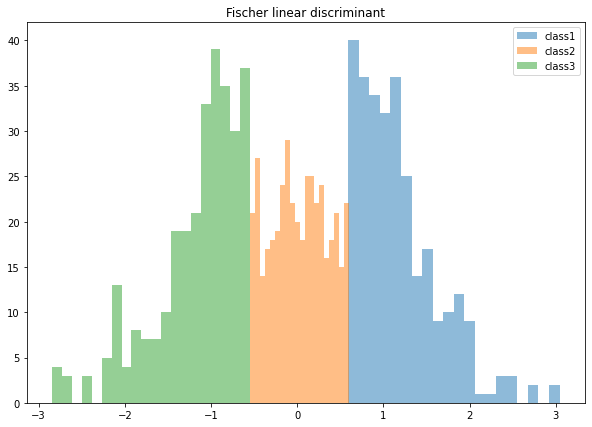

In [7]:
gen = ClassificationDataGenerator3(f1,f2)   
X,y = gen(n=1000,encoding="label")  

m = X.mean(axis = 0)
s = X.std(axis = 0)
X = (X - m)/s 

fish = Fisher(n_components=1)  
X_1d = fish.fit_transform(X,y)
fig = plt.figure(figsize=(10,7)) 
X_1d_class1 = X_1d[y == 0]
X_1d_class2 = X_1d[y == 1]
X_1d_class3 = X_1d[y == 2]
ax = fig.add_subplot(1,1,1)
ax.hist(X_1d_class1,bins=20,alpha=0.5,label="class1")
ax.hist(X_1d_class2,bins=20,alpha=0.5,label="class2") 
ax.hist(X_1d_class3,bins=20,alpha=0.5,label="class3") 
ax.set_title("Fischer linear discriminant")
plt.legend()
plt.show()

# Perceptron Algorithum

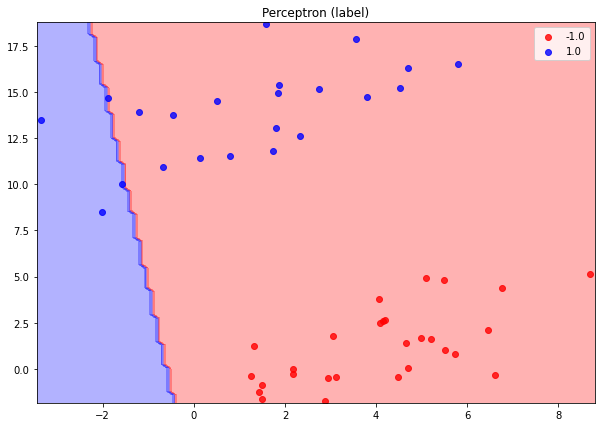

In [8]:
gen = ClassificationDataGenerator2(f) 
X,y = gen(encoding="label")  

X[y == 1,1] += 10

pn = Perceptron(learning_rate=1e-4,max_iter=100) 
pn.fit(X,y)
plot_classifier(X,y,pn,title="Perceptron (label)")

# Probabilistic Generative Model

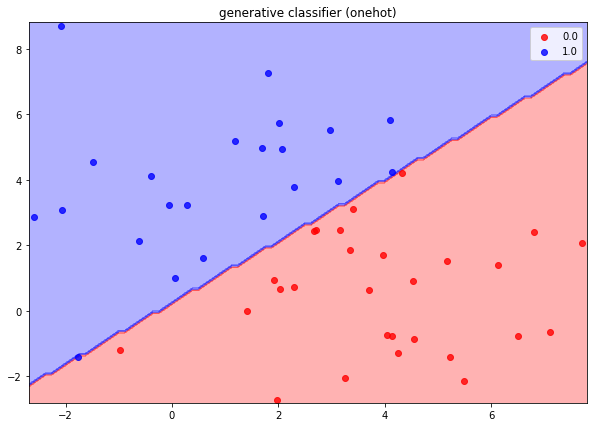

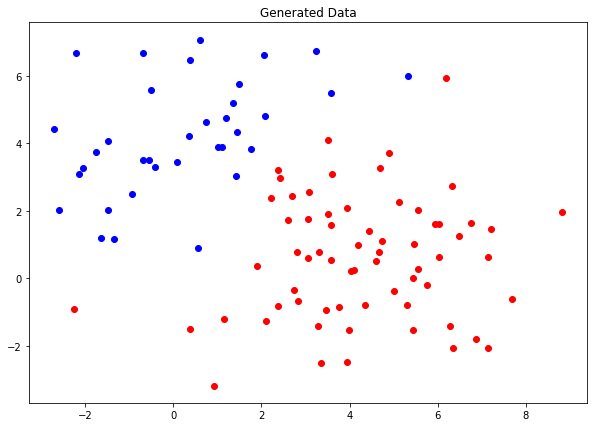

In [9]:
gen = ClassificationDataGenerator2(f) 
X,y = gen(encoding="onehot")  

pn = GenerativeClassifier() 
pn.fit(X,y)
plot_classifier(X,y,pn,title="generative classifier (onehot)")

X_gen,y_gen = pn.generate(size = 100)
X_gen1 = X_gen[y_gen[:,0] == 1] 
X_gen2 = X_gen[y_gen[:,1] == 1]

fig,ax = plt.subplots(figsize=(10,7))
ax.scatter(X_gen1[:,0],X_gen1[:,1],color = "red")
ax.scatter(X_gen2[:,0],X_gen2[:,1],color = "blue")
ax.set_title("Generated Data")
plt.show()

# Probabilistic Discriminative Models

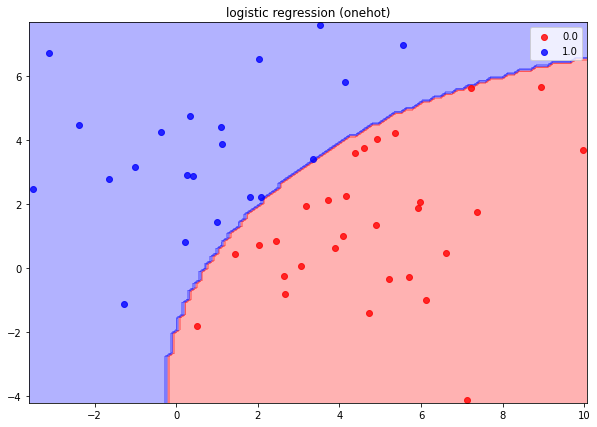

In [10]:
gen = ClassificationDataGenerator2(f) 
X,y = gen(encoding="onehot")  

lr = LogisticRegression(basis_function="polynomial",deg=2) 
lr.fit(X,y)
plot_classifier(X,y,lr,title="logistic regression (onehot)")

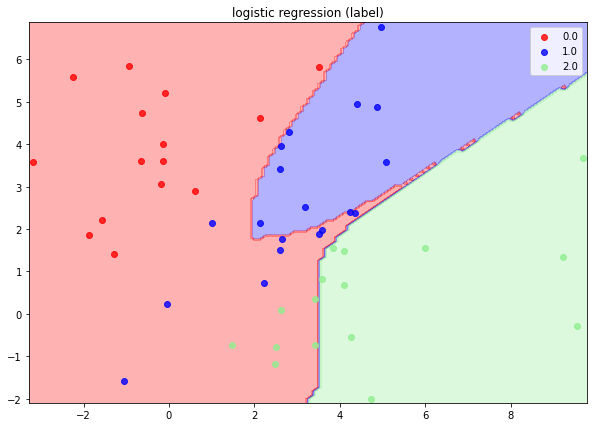

In [11]:
gen = ClassificationDataGenerator3(f1,f2)  
X,y = gen(encoding="label")  

lr = MultiClassLogisticRegression(max_iter=10000,threshold=1e-4,learning_rate=1e-5,basis_function="polynomial",deg=5) 
lr.fit(X,y)
plot_classifier(X,y,lr,title="logistic regression (label)") 

# Bayesian Logistic Regression

In [12]:
def g(x):
    return x*x - 1

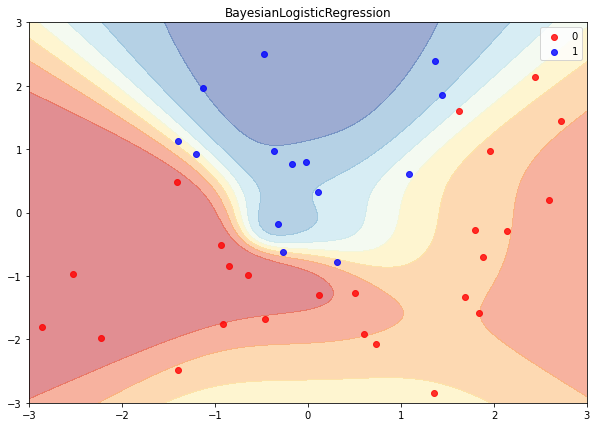

In [13]:
gen = ClassificationDataGenerator2(g) 
X_tr,y_tr = gen(encoding="label",x_lower=-2,x_upper=2,y_lower=-2,y_upper=2)  

lr = BayesianLogisticRegression(basis_function="polynomial",deg=4) 
lr.fit(X_tr,y_tr)

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
xs,ys = np.meshgrid(x,y)
probs = lr.predict(np.array([xs.ravel(),ys.ravel()]).T,return_prob=True).ravel() 
probs = probs.reshape(xs.shape)

cmap = plt.get_cmap("RdYlBu")
figure,axes = plt.subplots(1,1,figsize=(10,7))
axes.contourf(xs,ys,probs,alpha=0.5,cmap = cmap)
axes.set_xlim(-3,3)
axes.set_ylim(-3,3)

axes.scatter(x = X_tr[y_tr == 0,0],
            y = X_tr[y_tr == 0,1],
            alpha = 0.8,
            c = "red",
            label = "0")
axes.scatter(x = X_tr[y_tr == 1,0],
            y = X_tr[y_tr == 1,1],
            alpha = 0.8,
            c = "blue",
            label = "1")

axes.set_title("BayesianLogisticRegression")
plt.legend()
plt.show()